In [1]:
#数据分析及可视化的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#通过pandas读取数据，以便进一步分析
dataset = pd.read_csv("data.csv")
dataset.head()

,brand,title,start_time,distance,volumn,gear,tag,price
0,大众,迈腾 2015款 改款 1.8TSI 豪华型-超高性价比,2015年,6万公里,1.8升,自动,放心购_会员3年,13.48
1,别克,君越 2010款 2.4L豪华版-车况精品无事故,2010年,6.9万公里,2.4升,自动,放心购_会员1年,5.98
2,依维柯,2013款 2.5TV39 箱货低顶-精品宝迪 价格可小议,2013年,8万公里,2.5升,手动,放心购_会员1年_可分期付,9.68
3,福特,福克斯两厢 2017款 两厢 1.6L 手动风尚型智行版-首付低 利率低 提车快,2018年,0.18万公里,1.6升,手动,放心购_会员1年,8.52
4,大众,迈腾 2015款 改款 1.8TSI 豪华型-超高性价比,2015年,6万公里,1.8升,自动,放心购_会员3年,13.48


In [3]:
dataset.describe()

,price
count,3640.000000
mean,8.609808
std,8.670075
min,0.600000
25%,4.995000
50%,7.645000
75%,10.962500
max,225.000000


In [4]:
tag_list = list()
dataset['tag'].apply(lambda x:tag_list.extend(x.split("_")))#按照_对tag字段进行切分
tag_list = list(set(tag_list))
tag_list

['会员7年',
 '会员6年',
 '营转非',
 '放心购',
 '商家',
 '好评率100.0%',
 '会员3年',
 '好评率85.0%',
 '会员4年',
 '会员2年',
 '高配',
 '可分期付',
 '会员5年',
 '低配',
 '会员1年']

In [5]:
tag_df = pd.DataFrame(columns=tag_list)

In [6]:
df = pd.concat([dataset, tag_df], sort=False)  #讲多个字段连接在一起
df[tag_list] = df[tag_list].fillna(0)

In [7]:
df.head()

,brand,title,start_time,distance,volumn,gear,tag,price,会员7年,会员6年,...,好评率100.0%,会员3年,好评率85.0%,会员4年,会员2年,高配,可分期付,会员5年,低配,会员1年
0,大众,迈腾 2015款 改款 1.8TSI 豪华型-超高性价比,2015年,6万公里,1.8升,自动,放心购_会员3年,13.48,0,0,...,0,0,0,0,0,0,0,0,0,0
1,别克,君越 2010款 2.4L豪华版-车况精品无事故,2010年,6.9万公里,2.4升,自动,放心购_会员1年,5.98,0,0,...,0,0,0,0,0,0,0,0,0,0
2,依维柯,2013款 2.5TV39 箱货低顶-精品宝迪 价格可小议,2013年,8万公里,2.5升,手动,放心购_会员1年_可分期付,9.68,0,0,...,0,0,0,0,0,0,0,0,0,0
3,福特,福克斯两厢 2017款 两厢 1.6L 手动风尚型智行版-首付低 利率低 提车快,2018年,0.18万公里,1.6升,手动,放心购_会员1年,8.52,0,0,...,0,0,0,0,0,0,0,0,0,0
4,大众,迈腾 2015款 改款 1.8TSI 豪华型-超高性价比,2015年,6万公里,1.8升,自动,放心购_会员3年,13.48,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#将tag中的数据 处理为数字
def set_tag_status(series):
    tag = series['tag'].split("_")
    for t in tag:
        series[t] = 1
    return series
df[tag_list] = df[['tag',*tag_list]].apply(lambda x:set_tag_status(x),axis = 1).drop('tag',axis=1)
df.head()

,brand,title,start_time,distance,volumn,gear,tag,price,会员7年,会员6年,...,好评率100.0%,会员3年,好评率85.0%,会员4年,会员2年,高配,可分期付,会员5年,低配,会员1年
0,大众,迈腾 2015款 改款 1.8TSI 豪华型-超高性价比,2015年,6万公里,1.8升,自动,放心购_会员3年,13.48,0,0,...,0,1,0,0,0,0,0,0,0,0
1,别克,君越 2010款 2.4L豪华版-车况精品无事故,2010年,6.9万公里,2.4升,自动,放心购_会员1年,5.98,0,0,...,0,0,0,0,0,0,0,0,0,1
2,依维柯,2013款 2.5TV39 箱货低顶-精品宝迪 价格可小议,2013年,8万公里,2.5升,手动,放心购_会员1年_可分期付,9.68,0,0,...,0,0,0,0,0,0,1,0,0,1
3,福特,福克斯两厢 2017款 两厢 1.6L 手动风尚型智行版-首付低 利率低 提车快,2018年,0.18万公里,1.6升,手动,放心购_会员1年,8.52,0,0,...,0,0,0,0,0,0,0,0,0,1
4,大众,迈腾 2015款 改款 1.8TSI 豪华型-超高性价比,2015年,6万公里,1.8升,自动,放心购_会员3年,13.48,0,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
df = df.drop('tag',axis=1)

In [12]:
df.head()

,brand,title,start_time,distance,volumn,gear,price,会员7年,会员6年,营转非,...,好评率100.0%,会员3年,好评率85.0%,会员4年,会员2年,高配,可分期付,会员5年,低配,会员1年
0,大众,迈腾 2015款 改款 1.8TSI 豪华型-超高性价比,2015年,6万公里,1.8升,自动,13.48,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,别克,君越 2010款 2.4L豪华版-车况精品无事故,2010年,6.9万公里,2.4升,自动,5.98,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,依维柯,2013款 2.5TV39 箱货低顶-精品宝迪 价格可小议,2013年,8万公里,2.5升,手动,9.68,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,福特,福克斯两厢 2017款 两厢 1.6L 手动风尚型智行版-首付低 利率低 提车快,2018年,0.18万公里,1.6升,手动,8.52,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,大众,迈腾 2015款 改款 1.8TSI 豪华型-超高性价比,2015年,6万公里,1.8升,自动,13.48,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [13]:
#显示所有列
pd.set_option('display.max_columns',None)
df.head()

,brand,title,start_time,distance,volumn,gear,price,会员7年,会员6年,营转非,放心购,商家,好评率100.0%,会员3年,好评率85.0%,会员4年,会员2年,高配,可分期付,会员5年,低配,会员1年
0,大众,迈腾 2015款 改款 1.8TSI 豪华型-超高性价比,2015年,6万公里,1.8升,自动,13.48,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,别克,君越 2010款 2.4L豪华版-车况精品无事故,2010年,6.9万公里,2.4升,自动,5.98,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,依维柯,2013款 2.5TV39 箱货低顶-精品宝迪 价格可小议,2013年,8万公里,2.5升,手动,9.68,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,福特,福克斯两厢 2017款 两厢 1.6L 手动风尚型智行版-首付低 利率低 提车快,2018年,0.18万公里,1.6升,手动,8.52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,大众,迈腾 2015款 改款 1.8TSI 豪华型-超高性价比,2015年,6万公里,1.8升,自动,13.48,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [14]:
#删除标题 
df = df.drop('title',axis=1)

In [15]:
#分析平均价格最高的前10个品牌
num_top = df.groupby('brand')['price'].mean().sort_values(ascending=False)[:10]
num_top

brand
法拉利     225.000000
宾利      179.000000
东风       68.800000
玛莎拉蒂     63.390000
保时捷      59.400000
路虎       56.496000
特斯拉      36.790000
奔驰       25.654082
雷克萨斯     18.576667
领克       16.120000
Name: price, dtype: float64

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


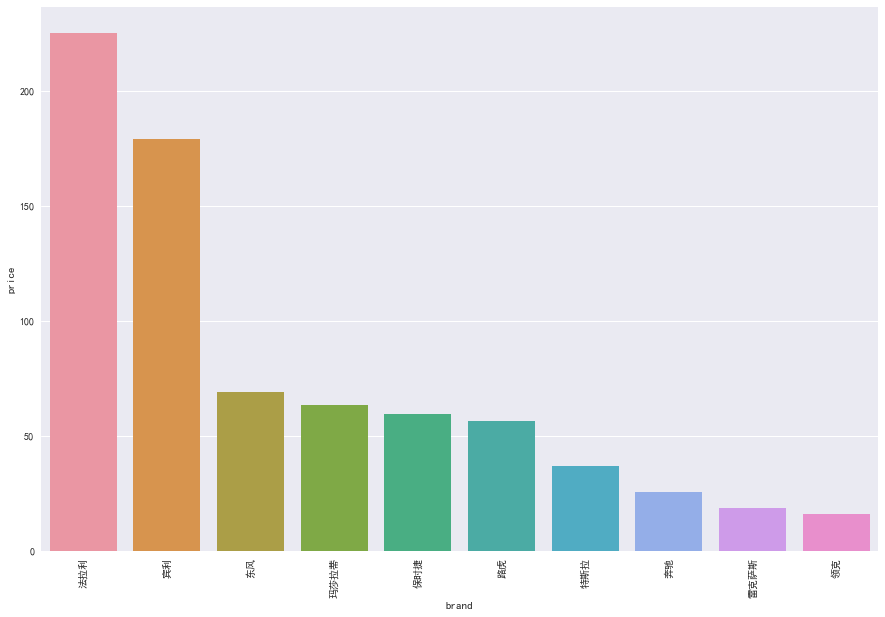

In [17]:
sns.set(font="SimHei")
fig = plt.figure(figsize=(15,10))
sns.barplot(num_top.index,num_top)
plt.xticks(rotation=90) #坐标轴旋转90度
fig.show()

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


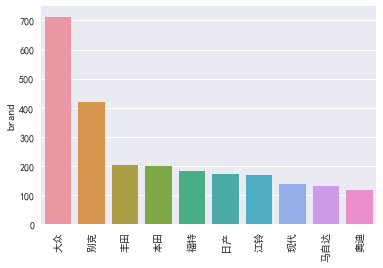

In [18]:
#销量分析   销量最多的前10个品牌
num_top = df['brand'].value_counts().sort_values(ascending=False)[:10]
fig = plt.figure()
sns.barplot(num_top.index,num_top)
plt.xticks(rotation=90)
fig.show()

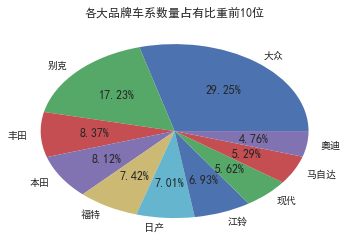

In [19]:
#各大品牌车系数量占有比重 前10
fig = plt.figure()
plt.pie(num_top,labels=num_top.index,autopct="%1.2f%%")#保留朗威小数
plt.title("各大品牌车系数量占有比重前10位")
plt.show()

In [20]:
#对大众车价格进行分区并显示各分区的概率
df_dazhong = df[df['brand']=='大众']
df_dazhong.head()

,brand,start_time,distance,volumn,gear,price,会员7年,会员6年,营转非,放心购,商家,好评率100.0%,会员3年,好评率85.0%,会员4年,会员2年,高配,可分期付,会员5年,低配,会员1年
0,大众,2015年,6万公里,1.8升,自动,13.48,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,大众,2015年,6万公里,1.8升,自动,13.48,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
6,大众,2014年,4.45万公里,1.4升,自动,9.73,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7,大众,2017年,0.4万公里,1.6升,自动,11.48,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
9,大众,2015年,6万公里,1.8升,自动,13.48,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


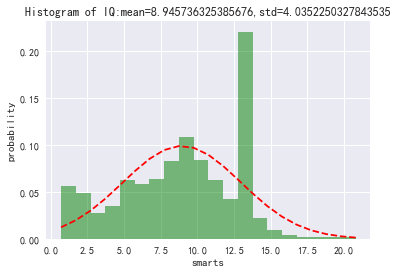

In [21]:
dazhong_mean = df_dazhong['price'].mean()
dazhong_std = df_dazhong['price'].std()
num_bins = 20 #条状图数量
n,bins,patches = plt.hist(df_dazhong['price'],num_bins,normed=1,facecolor='green',alpha=0.5)
import matplotlib.mlab as mlab
y = mlab.normpdf(bins,dazhong_mean,dazhong_std)
plt.plot(bins,y,'r--')
plt.xlabel("smarts")
plt.ylabel("probability")
plt.title(r"Histogram of IQ:mean={},std={}".format(dazhong_mean,dazhong_std))
plt.subplots_adjust(left=0.15)
plt.show()

In [22]:
df.head()

,brand,start_time,distance,volumn,gear,price,会员7年,会员6年,营转非,放心购,商家,好评率100.0%,会员3年,好评率85.0%,会员4年,会员2年,高配,可分期付,会员5年,低配,会员1年
0,大众,2015年,6万公里,1.8升,自动,13.48,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,别克,2010年,6.9万公里,2.4升,自动,5.98,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,依维柯,2013年,8万公里,2.5升,手动,9.68,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,福特,2018年,0.18万公里,1.6升,手动,8.52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,大众,2015年,6万公里,1.8升,自动,13.48,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [23]:
#特征工程
df['start_time']=df['start_time'].apply(lambda x:int(x[:-1]))
df['distance']=df['distance'].apply(lambda x:float(x[:-3]))

In [26]:
s = set(df['volumn'])
s

{'1.0升',
 '1.2升',
 '1.3升',
 '1.4升',
 '1.5升',
 '1.6升',
 '1.7升',
 '1.8升',
 '2.0升',
 '2.2升',
 '2.3升',
 '2.4升',
 '2.5升',
 '2.6升',
 '2.7升',
 '2.8升',
 '3.0升',
 '3.2升',
 '3.3升',
 '3.5升',
 '3.6升',
 '3.7升',
 '4.0升',
 '4.2升',
 '4.3升',
 '4.4升',
 '4.5升',
 '4.8升',
 '5.0升',
 '6.2升'}

In [25]:
df = df[~df['volumn'].str.contains('电动')] #把电动的删掉

In [27]:
df['volumn']=df['volumn'].apply(lambda x:float(x[:-1]))
df.head()

,brand,start_time,distance,volumn,gear,price,会员7年,会员6年,营转非,放心购,商家,好评率100.0%,会员3年,好评率85.0%,会员4年,会员2年,高配,可分期付,会员5年,低配,会员1年
0,大众,2015,6.00,1.8,自动,13.48,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,别克,2010,6.90,2.4,自动,5.98,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,依维柯,2013,8.00,2.5,手动,9.68,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,福特,2018,0.18,1.6,手动,8.52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,大众,2015,6.00,1.8,自动,13.48,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [28]:
one_hot_df = pd.get_dummies(df[['brand','gear']])

In [29]:
df = df.drop('brand',axis=1).drop('gear',axis=1)
df = pd.merge(df,one_hot_df,left_index=True,right_index=True)
df.head()

,start_time,distance,volumn,price,会员7年,会员6年,营转非,放心购,商家,好评率100.0%,会员3年,好评率85.0%,会员4年,会员2年,高配,可分期付,会员5年,低配,会员1年,brand_MG,brand_MINI,brand_WEY,brand_一汽,brand_三菱,brand_上海汇众,brand_东风,brand_东风风光,brand_东风风神,brand_中华,brand_丰田,brand_五菱,brand_依维柯,brand_保时捷,brand_克莱斯勒,brand_凯迪拉克,brand_别克,brand_力帆,brand_北汽制造,brand_北汽威旺,brand_北汽绅宝,brand_双龙,brand_吉利,brand_吉普,brand_启辰,brand_哈弗,brand_大众,brand_大通,brand_奇瑞,brand_奔腾,brand_奔驰,brand_奥迪,brand_宝马,brand_宝骏,brand_宾利,brand_广汽,brand_思铭,brand_捷豹,brand_斯巴鲁,brand_斯柯达,brand_日产,brand_本田,brand_标致,brand_比亚迪,brand_比速汽车,brand_江淮,brand_江铃,brand_沃尔沃,brand_法拉利,brand_玛莎拉蒂,brand_现代,brand_福特,brand_福田,brand_精灵smart,brand_荣威,brand_菲亚特,brand_观致,brand_起亚,brand_路虎,brand_道奇,brand_金杯,brand_铃木,brand_长丰,brand_长城,brand_长安,brand_陆风,brand_雪佛兰,brand_雪铁龙,brand_雷克萨斯,brand_雷诺,brand_领克,brand_风行,brand_马自达,gear_手动,gear_自动
0,2015,6.00,1.8,13.48,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2010,6.90,2.4,5.98,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2013,8.00,2.5,9.68,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2018,0.18,1.6,8.52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2015,6.00,1.8,13.48,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
len(df.columns)

94

In [31]:
#建模
#数据准备
X = df[df.columns.difference(['price'])].values  #除价格以外的所有字段
Y = df['price'].values

In [32]:
#导包
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [39]:
#切分数据集
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=6)
#模型
gbdt = GradientBoostingRegressor(n_estimators=70)
#训练模型
gbdt.fit(x_train,y_train)
pred = gbdt.predict(x_test)

In [38]:
result_df = pd.DataFrame(np.concatenate((y_test.reshape(-1,1),pred.reshape(-1,1)),axis=1),columns=['y_pred','y_test'])
result_df.head()

,y_pred,y_test
0,5.18,5.986314
1,14.93,13.501840
2,3.00,4.810431
3,0.90,1.796878
4,12.64,10.298165


In [40]:
#评估
print("MSE",mean_squared_error(pred,y_test))
print("MAE",mean_absolute_error(pred,y_test))
print("RMSE",np.sqrt(mean_squared_error(pred,y_test)))
print("R2",r2_score(pred,y_test))

MSE 30.245949811831064
MAE 2.138488669158107
RMSE 5.49963178875014
R2 0.3079262904803056
